<a href="https://colab.research.google.com/github/KhalidNazzar/Best-Streaming-Service-Analysis/blob/main/service_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('tv_shows.csv')
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [ ]:
data.drop_duplicates(subset='Title',keep = 'first', inplace=True)

In [ ]:
data.isnull().sum()

Unnamed: 0            0
Title                 0
Year                  0
Age                2427
IMDb               1156
Rotten Tomatoes    4560
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

In [ ]:
data.Title.duplicated().sum()

0

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5606    False
5607    False
5608    False
5609    False
5610    False
Length: 5564, dtype: bool

In [ ]:
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].fillna('0%')

In [ ]:
data

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,0%,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,0%,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,0%,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,0%,0,0,0,1,1


In [ ]:
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].apply(lambda x : x.rstrip('%'))
data['Rotten Tomatoes'] = pd.to_numeric(data['Rotten Tomatoes'])

In [ ]:
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97,1,0,0,0,1


In [ ]:
data

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,0,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,0,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,0,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,0,0,0,0,1,1


In [ ]:
type(data['Rotten Tomatoes'])

pandas.core.series.Series

(array([0.00158275, 0.00263791, 0.01081543, 0.02215844, 0.04167898,
        0.10947326, 0.27645296, 0.38038661, 0.29175284, 0.02585152]),
 array([1.  , 1.86, 2.72, 3.58, 4.44, 5.3 , 6.16, 7.02, 7.88, 8.74, 9.6 ]),
 <a list of 10 Patch objects>)

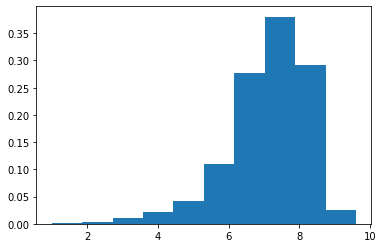

In [ ]:
plt.hist('IMDb', density=True, data = data)

In [ ]:
data.isnull().sum()

Unnamed: 0            0
Title                 0
Year                  0
Age                2427
IMDb               1156
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

In [ ]:
data['IMDb'] = data['IMDb'].fillna(0)
data['IMDb'] = data['IMDb']*10
data['IMDb'] = data['IMDb'].astype('int')

In [ ]:
data

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,95,96,1,0,0,0,1
1,1,Stranger Things,2016,16+,88,93,1,0,0,0,1
2,2,Money Heist,2017,18+,84,91,1,0,0,0,1
3,3,Sherlock,2010,16+,91,78,1,0,0,0,1
4,4,Better Call Saul,2015,18+,87,97,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,0,0,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,0,0,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,0,0,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,0,0,0,0,0,1,1


In [ ]:
data.isnull().sum()

Unnamed: 0            0
Title                 0
Year                  0
Age                2427
IMDb                  0
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

In [ ]:
tv_shows_long=pd.melt(data[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')
tv_shows_long = tv_shows_long[tv_shows_long['Present'] == 1]
tv_shows_long.drop(columns=['Present'],inplace=True)

In [ ]:
tv_shows_long.head()

,Title,StreamingOn
0,Breaking Bad,Netflix
1,Stranger Things,Netflix
2,Money Heist,Netflix
3,Sherlock,Netflix
4,Better Call Saul,Netflix


In [ ]:
tv_shows_combined = tv_shows_long.merge(data, on='Title', how='inner')

In [ ]:
tv_shows_combined

,Title,StreamingOn,Unnamed: 0,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,Netflix,0,2008,18+,95,96,1,0,0,0,1
1,Stranger Things,Netflix,1,2016,16+,88,93,1,0,0,0,1
2,Money Heist,Netflix,2,2017,18+,84,91,1,0,0,0,1
3,Sherlock,Netflix,3,2010,16+,91,78,1,0,0,0,1
4,Better Call Saul,Netflix,4,2015,18+,87,97,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5953,Sawyer Sessions,Prime Video,5450,2015,NaN,0,0,0,0,1,0,1
5954,Pinkfong! Dinosaur Songs,Prime Video,5451,2014,NaN,0,0,0,0,1,0,1
5955,How To Self-Publish,Prime Video,5452,2017,NaN,0,0,0,0,1,0,1
5956,BigDo2 - Random Hair,Prime Video,5453,2016,NaN,0,0,0,0,1,0,1


In [ ]:
tv_shows_combined.drop(columns = ['Unnamed: 0','Netflix',
                                  'Hulu', 'Prime Video', 'Disney+', 'type'], inplace=True)

In [ ]:
tv_shows_combined

,Title,StreamingOn,Year,Age,IMDb,Rotten Tomatoes
0,Breaking Bad,Netflix,2008,18+,95,96
1,Stranger Things,Netflix,2016,16+,88,93
2,Money Heist,Netflix,2017,18+,84,91
3,Sherlock,Netflix,2010,16+,91,78
4,Better Call Saul,Netflix,2015,18+,87,97
...,...,...,...,...,...,...
5953,Sawyer Sessions,Prime Video,2015,NaN,0,0
5954,Pinkfong! Dinosaur Songs,Prime Video,2014,NaN,0,0
5955,How To Self-Publish,Prime Video,2017,NaN,0,0
5956,BigDo2 - Random Hair,Prime Video,2016,NaN,0,0


In [ ]:
tv_shows_combined.head()

,Title,StreamingOn,Year,Age,IMDb,Rotten Tomatoes
0,Breaking Bad,Netflix,2008,18+,95,96
1,Stranger Things,Netflix,2016,16+,88,93
2,Money Heist,Netflix,2017,18+,84,91
3,Sherlock,Netflix,2010,16+,91,78
4,Better Call Saul,Netflix,2015,18+,87,97


In [ ]:
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,95,96,1,0,0,0,1
1,1,Stranger Things,2016,16+,88,93,1,0,0,0,1
2,2,Money Heist,2017,18+,84,91,1,0,0,0,1
3,3,Sherlock,2010,16+,91,78,1,0,0,0,1
4,4,Better Call Saul,2015,18+,87,97,1,0,0,0,1


In [ ]:
tv_shows_both_ratings = tv_shows_combined[(tv_shows_combined.IMDb>0) & tv_shows_combined['Rotten Tomatoes'] >0]

In [ ]:
tv_shows_both_ratings

,Title,StreamingOn,Year,Age,IMDb,Rotten Tomatoes
1,Stranger Things,Netflix,2016,16+,88,93
2,Money Heist,Netflix,2017,18+,84,91
4,Better Call Saul,Netflix,2015,18+,87,97
5,The Office,Netflix,2005,16+,89,81
6,Black Mirror,Netflix,2011,18+,88,83
...,...,...,...,...,...,...
4622,Prime Suspect: Tennison,Prime Video,2017,16+,75,47
4652,Great Expectations,Prime Video,1998,18+,72,37
4695,The Simple Life,Prime Video,2003,16+,38,35
4705,Flash Gordon,Prime Video,2007,7+,48,15


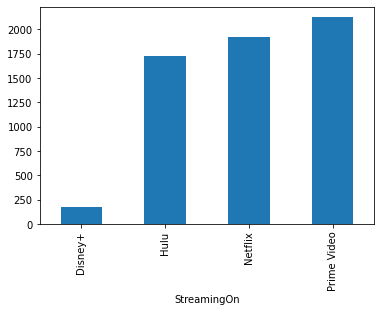

In [ ]:
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

In [ ]:
tv_shows_combined

,Title,StreamingOn,Year,Age,IMDb,Rotten Tomatoes
0,Breaking Bad,Netflix,2008,18+,95,96
1,Stranger Things,Netflix,2016,16+,88,93
2,Money Heist,Netflix,2017,18+,84,91
3,Sherlock,Netflix,2010,16+,91,78
4,Better Call Saul,Netflix,2015,18+,87,97
...,...,...,...,...,...,...
5953,Sawyer Sessions,Prime Video,2015,NaN,0,0
5954,Pinkfong! Dinosaur Songs,Prime Video,2014,NaN,0,0
5955,How To Self-Publish,Prime Video,2017,NaN,0,0
5956,BigDo2 - Random Hair,Prime Video,2016,NaN,0,0


In [ ]:
figure = []

figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)
for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=1500, height=1500)        
fig.show()

[Figure({
     'data': [{'alignmentgroup': 'True',
               'box': {'visible': False},
               'hoverlabel': {'namelength': 0},
               'hovertemplate': 'StreamingOn=%{x}<br>IMDb=%{y}',
               'legendgroup': 'StreamingOn=Netflix',
               'marker': {'color': '#636efa'},
               'name': 'StreamingOn=Netflix',
               'offsetgroup': 'StreamingOn=Netflix',
               'orientation': 'v',
               'scalegroup': 'True',
               'showlegend': True,
               'type': 'violin',
               'x': array(['Netflix', 'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Netflix',
                           'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Netflix',
                           'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Netflix',
                           'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Netflix',
                           'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Netflix', '

In [ ]:
px.scatter(tv_shows_both_ratings, x = 'IMDb',
           y = 'Rotten Tomatoes', color='StreamingOn')